# Charger la dataset Titanic survivors

In [54]:
#!pip install opendatasets

In [55]:
import opendatasets as od

In [56]:
dataset= "https://www.kaggle.com/competitions/titanic/data?select=train.csv"

In [57]:
od.download(dataset)

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df1=pd.read_csv('./titanic/train.csv')

# Analyse de contenu du dataset

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
#null values
df1.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [64]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
df1.dropna(inplace=True)
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [66]:
df1.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [67]:
df1.head()

,Survived,Pclass,Sex,Age,Fare
1,1,1,female,38.0,71.2833
3,1,1,female,35.0,53.1000
6,0,1,male,54.0,51.8625
10,1,3,female,4.0,16.7000
11,1,1,female,58.0,26.5500


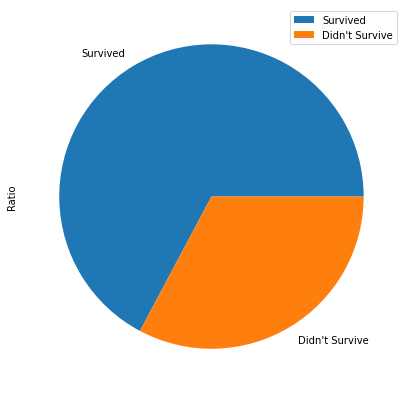

In [68]:
numbSurv=len(df1[ df1['Survived']== 1  ])
numbNonSurv=len(df1[ df1['Survived']== 0  ])
df = pd.DataFrame({'Ratio': [numbSurv, numbNonSurv ]
                   },
                  index=["Survived", "Didn't Survive"])
plot = df.plot.pie(y='Ratio', figsize=(10, 7))

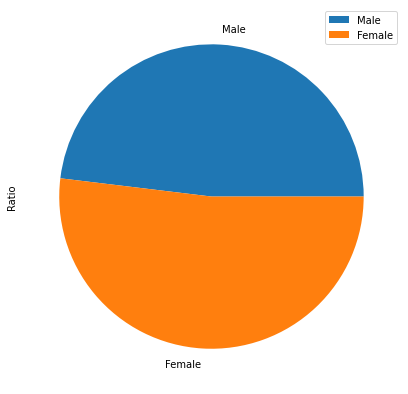

In [69]:
numbSurv=len(df1[ df1['Sex']== 'female'  ])
numbNonSurv=len(df1[ df1['Sex']== 'male'  ])
df = pd.DataFrame({'Ratio': [numbSurv, numbNonSurv ]
                   },
                  index=["Male", "Female"])
plot = df.plot.pie(y='Ratio', figsize=(10, 7))

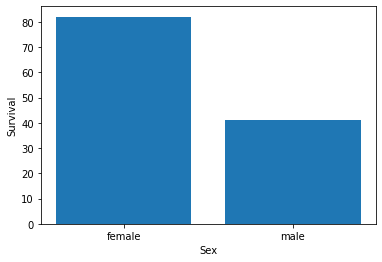

In [70]:
df=df1.groupby('Sex')['Survived'].apply(lambda x : x.sum())
nbf=df["female"]
nbm=df["male"]
x=np.array([nbf,nbm])
y=np.array(['female','male'])
plt.bar(y,x)
plt.xlabel('Sex')
plt.ylabel('Survival')
plt.show()

In [71]:
inputs = df1.drop('Survived',axis='columns')
target = df1.Survived

In [72]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [73]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
1,1,female,38.0,71.2833,1,0
3,1,female,35.0,53.1000,1,0
6,1,male,54.0,51.8625,0,1
10,3,female,4.0,16.7000,1,0
11,1,female,58.0,26.5500,1,0


In [74]:
inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
1,1,38.0,71.2833,1,0
3,1,35.0,53.1000,1,0
6,1,54.0,51.8625,0,1
10,3,4.0,16.7000,1,0
11,1,58.0,26.5500,1,0


# Applying naive bayes to Dataset

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [77]:
model.fit(X_train,y_train)

GaussianNB()

In [78]:
model.score(X_test,y_test)

0.6727272727272727

In [79]:
model.predict(X_test[0:10])

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
model.predict_proba(X_test[:10])

array([[8.47471001e-05, 9.99915253e-01],
       [9.36301638e-01, 6.36983618e-02],
       [2.32020557e-04, 9.99767979e-01],
       [9.98644537e-01, 1.35546264e-03],
       [2.24709055e-05, 9.99977529e-01],
       [9.14657135e-01, 8.53428646e-02],
       [7.45311574e-05, 9.99925469e-01],
       [9.20309966e-01, 7.96900340e-02],
       [8.30854822e-01, 1.69145178e-01],
       [9.18276944e-01, 8.17230555e-02]])

In [81]:
#Evaluationg model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.80769231, 0.80769231, 0.69230769, 0.8       , 0.68      ])